In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('eda_data.csv')

### Choose relevant columns

In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state_hq', 'age', 'python_yn',
       'aws_yn', 'r_yn', 'spark', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [8]:
df_model = df[['avg_salary','Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
             'num_comp', 'Hourly', 'Employer_provided', 'job_state', 'same_state_hq',
             'age', 'python_yn', 'spark', 'aws_yn', 'excel', 'job_simp', 'seniority', 'desc_len']]
df_model.head()

avg_salary  Rating                    Size   Type of ownership  \
0        72.0     3.8   501 to 1000 employees   Company - Private   
1        87.5     3.4        10000+ employees  Other Organization   
2        85.0     4.8   501 to 1000 employees   Company - Private   
3        76.5     3.8  1001 to 5000 employees          Government   
4       114.5     2.9     51 to 200 employees   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  num_comp  Hourly  Employer_provided  \
0         $50 to $100 million (USD)         0       0                  0   
1            $2 to $5 billion (USD)         0       0                  0   
2        $100 to $500 million (USD)         0       0                  0   
3  $500 million to $1 billion (USD)         3       0                  0   
4          Unknown / Non-Applicable         3       0                  0   

  job_state  same_state_hq  age  python_yn  spark  aws_yn  excel  \
0        NM              0   47          1      0       0      1   
1        MD              0   36          1      0       0      0   
2        FL              1   10          1      1       0      1   
3        WA              1   55          1      0       0      0   
4        NY              1   22          1      0       0      1   

         job_simp seniority  desc_len  
0  data scientist        na      2536  
1  data scientist        na      4783  
2  data scientist        na      3461  
3  data scientist        na      3883  
4  data scientist        na      2728

###  Get Dummy Data

In [9]:
df_dum = pd.get_dummies(df_model)
df_dum

avg_salary  Rating  num_comp  Hourly  Employer_provided  same_state_hq  \
0          72.0     3.8         0       0                  0              0   
1          87.5     3.4         0       0                  0              0   
2          85.0     4.8         0       0                  0              1   
3          76.5     3.8         3       0                  0              1   
4         114.5     2.9         3       0                  0              1   
..          ...     ...       ...     ...                ...            ...   
737        84.5     3.9         3       0                  0              0   
738       102.5     4.4         3       0                  0              0   
739        73.5     2.6         0       0                  0              1   
740       127.5     3.2         0       0                  0              0   
741        93.5     3.6         0       0                  0              0   

     age  python_yn  spark  aws_yn  ...  job_simp_analyst  \
0     47          1      0       0  ...                 0   
1     36          1      0       0  ...                 0   
2     10          1      1       0  ...                 0   
3     55          1      0       0  ...                 0   
4     22          1      0       0  ...                 0   
..   ...        ...    ...     ...  ...               ...   
737  190          0      0       1  ...                 0   
738   14          1      1       1  ...                 0   
739   36          0      0       0  ...                 0   
740   -1          0      0       0  ...                 0   
741   53          1      0       0  ...                 0   

     job_simp_data engineer  job_simp_data scientist  job_simp_director  \
0                         0                        1                  0   
1                         0                        1                  0   
2                         0                        1                  0   
3                         0                        1                  0   
4                         0                        1                  0   
..                      ...                      ...                ...   
737                       0                        0                  0   
738                       1                        0                  0   
739                       0                        0                  0   
740                       0                        0                  0   
741                       0                        0                  0   

     job_simp_manager  job_simp_mle  job_simp_na  seniority_jr  seniority_na  \
0                   0             0            0             0             1   
1                   0             0            0             0             1   
2                   0             0            0             0             1   
3                   0             0            0             0             1   
4                   0             0            0             0             1   
..                ...           ...          ...           ...           ...   
737                 0             0            1             0             0   
738                 0             0            0             0             0   
739                 0             0            1             0             1   
740                 1             0            0             0             1   
741                 0             0            1             0             1   

     seniority_senior  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
..                ...  
737                 1  
738                 1  
739                 0  
740                 0  
741                 0  

[742 rows x 178 columns]

### Train/test splits

In [13]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis = 1)
y = df_dum.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Multiple linear regression

In [19]:
import statsmodels.api as sm

X_sm = X = sm.add_constant(X_train)
model = sm.OLS(y_train,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     8.158
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           6.08e-66
Time:                        11:03:20   Log-Likelihood:                -2630.8
No. Observations:                 593   AIC:                             5544.
Df Residuals:                     452   BIC:                             6162.
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                37.7288      6.060      6.226      0.000      25.820      49.637
Rating                                                3.7062      2.323      1.595      0.111      -0.859       8.272
num_comp                                              2.5808      1.007      2.562      0.011       0.601       4.561
Hourly                                              -44.8194     10.705     -4.187      0.000     -65.857     -23.782
Employer_provided                                    25.5869     14.734      1.737      0.083      -3.369      54.543
same_state_hq                                         1.6419      3.032      0.542      0.588      -4.317       7.601
age                                                   0.0552      0.035      1.593      0.112      -0.013       0.123
python_yn                                             9.1406      2.860      3.196      0.001       3.519      14.762
spark                                                -4.7068      3.400     -1.384      0.167     -11.389       1.976
aws_yn                                                3.3124      3.133      1.057      0.291      -2.845       9.470
excel                                                 0.5763      2.651      0.217      0.828      -4.634       5.786
desc_len                                             -0.0007      0.001     -0.742      0.458      -0.002       0.001
Size_-1                                              13.8721      8.844      1.569      0.117      -3.508      31.252
Size_1 to 50 employees                                4.7100      7.455      0.632      0.528      -9.940      19.360
Size_10000+ employees                                -9.0827      6.972     -1.303      0.193     -22.784       4.618
Size_1001 to 5000 employees                           4.5767      4.440      1.031      0.303      -4.149      13.302
Size_201 to 500 employees                             0.3814      4.397      0.087      0.931      -8.260       9.023
Size_5001 to 10000 employees                         -4.5283      6.382     -0.710      0.478     -17.070       8.013
Size_501 to 1000 employees                            3.1023      4.680      0.663      0.508      -6.096      12.300
Size_51 to 200 employees                              5.2459      4.916      1.067      0.287      -4.416      14.908
Size_Unknown                                         19.4514     16.251      1.197      0.232     -12.486      51.389
Type of ownership_-1                                 13.8721      8.844      1.569      0.117      -3.508      31.252
Type of ownership_College / University               -2.3879     20.458     -0.117      0.907     -42.592      37.816
Type of ownersh

In [50]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)
np.mean(cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 4))
# the model is off by approx 20 dollars

-19.770697903821198

### Lasso Regression

In [48]:
lm_l = Lasso(alpha = 0.03)
lm_l.fit(X_train, y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 4))

-19.17859559196977

In [32]:
alpha = []
error = []

for i in range(1, 100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 4)))

/mnt/Data/DS_ENV/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 719.2294875192456, tolerance: 65.78754719101123
  model = cd_fast.enet_coordinate_descent(


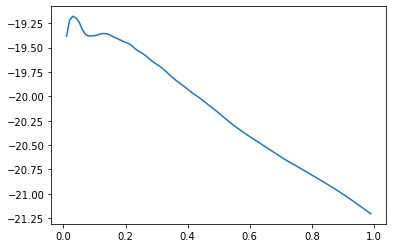

In [33]:
plt.plot(alpha, error)

In [36]:
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns = ['alpha', 'error'])
df_err[df_err.error == max(df_err.error)]

alpha      error
2   0.03 -19.178596

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 4))
# Best model yet!

-14.483413012425176

### Tune models using GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':range(10,300,10),
              'max_features':('sqrt', 'auto', 'log2'),
              'criterion': ('mse', 'mae')}

gs = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv = 4)

In [45]:
gs.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('sqrt', 'auto', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [46]:
gs.best_score_

-14.093228182565955

In [47]:
gs.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=240)

### Test ensembles

In [51]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [52]:
from sklearn.metrics import mean_absolute_error

In [53]:
mean_absolute_error(y_test, tpred_lm)

18.855189990207943

In [54]:
mean_absolute_error(y_test, tpred_lml)

19.03369254707248

In [55]:
mean_absolute_error(y_test, tpred_rf)

11.985346756152126